In [3]:
# Imports
%load_ext autoreload
%autoreload 2 
# !apt-get install -y xvfb
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import torch
from tqdm.notebook import tqdm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:

total_df = pd.read_csv("per_branch_pt_mode_classification_3_modes.csv")

<AxesSubplot:>

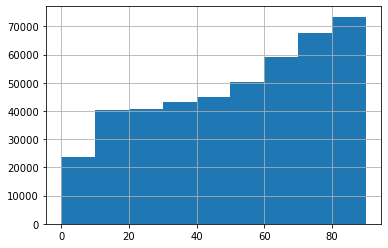

In [5]:
total_df.plane_rotation.hist(bins=9)

In [21]:
# total_df['angle']=total_df.angle.str.strip('[]').str.split(',')
# total_df['centerlinelength']=total_df.centerlinelength.str.strip('[]').str.split(',')
total_df['lobe'] = total_df.lobe.str.strip("[]").str.split(",")
# total_df['lobe'] = total_df.lobe.str.strip("[]").str.split(",")

AttributeError: Can only use .str accessor with string values!

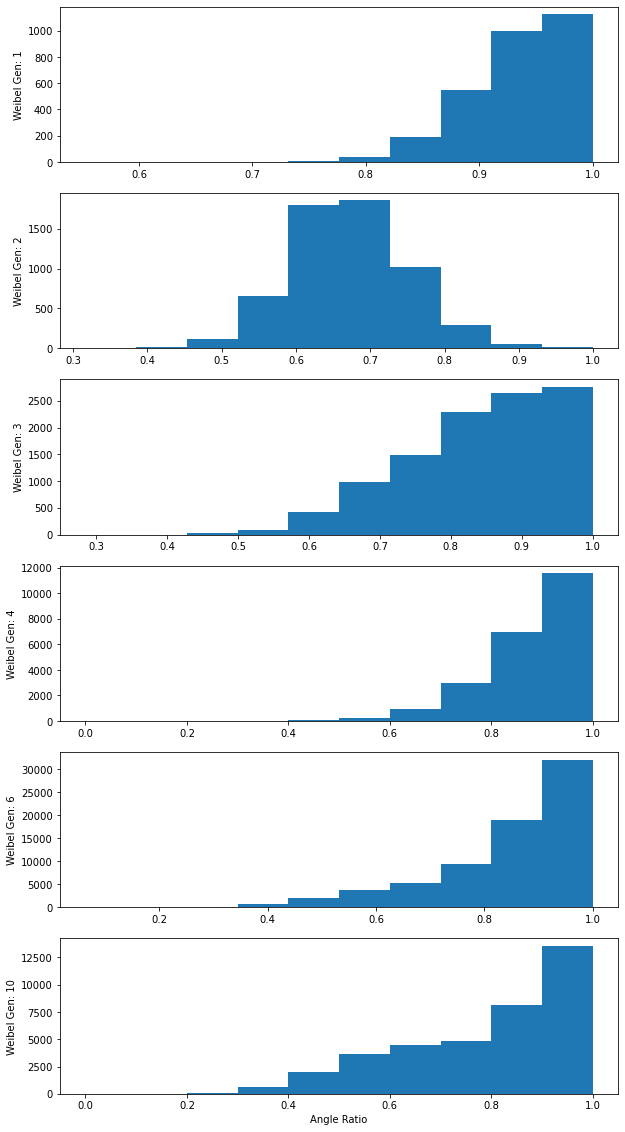

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [9]:
# Angle Ratios
# angle_ratio = total_df.angle.apply(lambda x:[float(i) for i in x]).apply(lambda x:min(x)/max(x) if len(x)==2 else np.nan)
# total_df['angle']=total_df.angle.str.strip('[]').str.split(',')
total_df['angle_ratio']=total_df.angle.apply(lambda x:[float(i) for i in x]).apply(lambda x:min(x)/max(x) if max(x)>0 else np.nan)
gens_to_show = [1,2,3,4,6,10]
f, axes = plt.subplots(len(gens_to_show),1, figsize=(10,20))
i=0
for gen in gens_to_show:
    total_df.loc[total_df.gen.astype(float)==gen]['angle_ratio'].hist(ax=axes[i], grid=False)
    axes[i].set_ylabel(f'Weibel Gen: {gen}')
    i+=1
axes[-1].set_xlabel('Angle Ratio')
plt.savefig('angle_ratio_gen_subplots.png')
plt.show()

plt.figure()
# total_df.groupby('gen').agg({'angle_ratio':lambda x:x.hist()})

In [10]:
total_df['min_angle']=total_df.angle.apply(lambda x:[float(i) for i in x]).apply(lambda x:min(x))
total_df['max_angle'] = total_df.angle.apply(lambda x:[float(i) for i in x]).apply(lambda x:max(x))
# limiting generations + removing trachea
plot_df = total_df.loc[(~(total_df.startbpid.astype(float)==-1))&(total_df.gen <=10) &(total_df.gen >1) &(total_df.startbpid != -1)]


In [13]:
# the zeros here are some from short segments (connectors) + some from longer --> could be error or correct --> only 23 segments so leaving in

total_df['min_centerline'] = total_df.centerlinelength.apply(lambda x:[float(i) for i in x]).apply(lambda x:min(x))
total_df.loc[(total_df.min_angle == 0) & (total_df.startbpid != -1)].sort_values(by='min_centerline')

,idno,startbpid,anatomicalname,centerlinelength,avginnerarea,lobe,sublobe,endbpid,angle,dircosx,...,bifurcation?,other_mode?,planar_bi,orthog_bi,other_bi,gen,angle_ratio,min_angle,max_angle,min_centerline
136058,4015770,204.0,"['-', '-']","[4.86568, 0.823471]","[11.1295, -1.0]","[2.0, 2.0]","[0.0, 0.0]","[288.0, 287.0]","[0.0, 121.646]","[0.212, -0.707107]",...,False,True,False,False,False,8,0.0,0.0,121.6460,0.823471
278344,6015336,130.0,"['-', '-']","[0.842214, 5.05328]","[-1.0, 17.0615]","[2.0, 2.0]","[9.0, 9.0]","[199.0, 200.0]","[60.0, 0.0]","[-0.707107, 0.0]",...,False,True,False,False,False,8,0.0,0.0,60.0000,0.842214
248412,5022169,181.0,"['-', '-']","[0.890044, 4.23948]","[-1.0, 6.12833]","[5.0, 5.0]","[16.0, 16.0]","[234.0, 235.0]","[103.263, 0.0]","[0.707107, 0.811107]",...,False,True,False,False,False,9,0.0,0.0,103.2630,0.890044
39078,3015068,131.0,"['-', '-']","[1.00111, 5.77323]","[-1.0, 5.16704]","[1.0, 1.0]","[4.0, 4.0]","[202.0, 203.0]","[65.7733, 0.0]","[-0.57735, 0.609208]",...,False,True,False,False,False,7,0.0,0.0,65.7733,1.001110
370523,7018835,392.0,"['-', '-']","[1.06641, 1.29288]","[-1.0, -1.0]","[5.0, 5.0]","[19.0, 19.0]","[401.0, 400.0]","[114.095, 0.0]","[0.0, 0.816497]",...,False,True,False,False,False,13,0.0,0.0,114.0950,1.066410
130017,4014995,429.0,"['-', '-']","[1.20041, 3.46763]","[-1.0, 4.21578]","[2.0, 2.0]","[8.0, 8.0]","[528.0, 529.0]","[90.0, 0.0]","[0.0, 0.557086]",...,False,True,False,False,False,10,0.0,0.0,90.0000,1.200410
26141,3013162,317.0,"['-', '-']","[1.32553, 2.00701]","[-1.0, -1.0]","[0.0, 0.0]","[5.0, 5.0]","[457.0, 458.0]","[118.126, 0.0]","[0.408248, -0.57735]",...,False,True,False,False,False,9,0.0,0.0,118.1260,1.325530
159024,4018974,558.0,"['-', '-']","[1.34488, 2.03637]","[-1.0, -1.0]","[5.0, 5.0]","[16.0, 16.0]","[593.0, 594.0]","[118.126, 0.0]","[-0.57735, -0.816497]",...,False,True,False,False,False,11,0.0,0.0,118.1260,1.344880
195967,5010160,241.0,"['-', '-']","[1.41406, 2.82828]","[-1.0, 5.09686]","[3.0, 3.0]","[10.0, 10.0]","[351.0, 352.0]","[114.095, 0.0]","[0.0, -0.408248]",...,False,True,False,False,False,9,0.0,0.0,114.0950,1.414060
270454,6013392,503.0,"['-', '-']","[2.94953, 1.45942]","[3.28171, -1.0]","[5.0, 5.0]","[16.0, 16.0]","[581.0, 582.0]","[0.0, 79.8974]","[-0.588348, 0.894427]",...,False,True,False,False,False,12,0.0,0.0,79.8974,1.459420


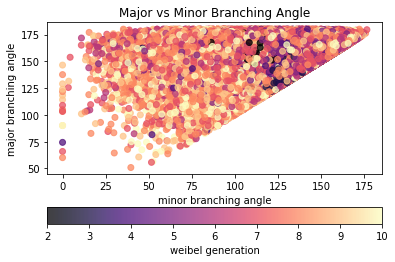

In [14]:
plt.figure()
plt.scatter(plot_df.min_angle, plot_df.max_angle, c=plot_df.gen,cmap='magma', alpha=0.75)
plt.colorbar(label="weibel generation", orientation="horizontal")
plt.xlabel("minor branching angle")
plt.ylabel("major branching angle")
plt.title('Major vs Minor Branching Angle')
plt.savefig('major_vs_minor_branching_angle.png')
plt.show()

In [27]:
pd.qcut(total_df.plane_rotation.dropna(), 10, labels=None, retbins=True)

(2         (-0.001, 15.154]
 3         (36.598, 46.643]
 4          (64.012, 71.24]
 5         (-0.001, 15.154]
 6          (71.24, 77.837]
                 ...       
 464864    (15.154, 26.088]
 464865    (-0.001, 15.154]
 464866      (84.041, 90.0]
 464867    (15.154, 26.088]
 464868    (-0.001, 15.154]
 Name: plane_rotation, Length: 443299, dtype: category
 Categories (10, interval[float64, right]): [(-0.001, 15.154] < (15.154, 26.088] < (26.088, 36.598] < (36.598, 46.643] ... (64.012, 71.24] < (71.24, 77.837] < (77.837, 84.041] < (84.041, 90.0]],
 array([ 0.        , 15.1544214 , 26.08773998, 36.59840109, 46.64254184,
        55.90743783, 64.01209937, 71.24033148, 77.83719896, 84.04092938,
        90.        ]))

/tmp/ipykernel_13935/417813056.py:40: FutureWarning: ['anatomicalname', 'centerlinelength', 'avginnerarea', 'sublobe', 'endbpid', 'angle', 'dircosx', 'dircosy', 'dircosz', 'weibel_generation', 'thetax_', 'thetaz_', 'thetay_', 'v_', 'plane_v', 'parent_plane_v'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped = w_lobes.groupby('lobe').agg(lambda x: 100*(sum(x)/len(x)))


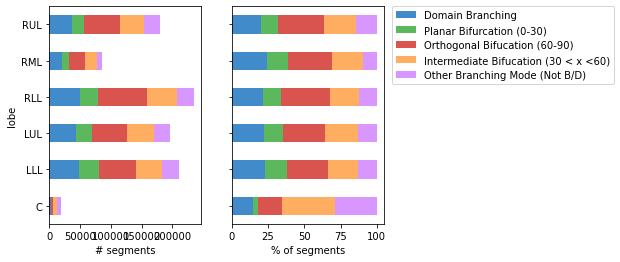

In [17]:
f, (ax1, ax2) = plt.subplots(1,2)

# colours = {
#     'Domain Branching':'#428bca', 
#     'Planar Bifurcation (0-20)':'#5cb85c',
#     'Orthogonal Bifucation (70-90)':'#d9534f',
#     'Other Bifucation (20 < x <70)':'#ffad60',
#     'Other Branching Mode (Not B/D)':'#d896ff'
# }
# renaming = {"domain?":"Domain Branching",
#     "bifurcation?": "Bifurcation",
#         "other_mode?":"Other Branching Mode (Not B/D)",
#             "planar_bi": "Planar Bifurcation (0-20)",
#                 "orthog_bi":"Orthogonal Bifucation (70-90)",
#                     "other_bi": "Other Bifucation (20 < x <70)"}

colours = {
    'Domain Branching':'#428bca', 
    'Planar Bifurcation (0-30)':'#5cb85c',
    'Orthogonal Bifucation (60-90)':'#d9534f',
    'Intermediate Bifucation (30 < x <60)':'#ffad60',
    'Other Branching Mode (Not B/D)':'#d896ff'
}
renaming = {"domain?":"Domain Branching",
    "bifurcation?": "Bifurcation",
        "other_mode?":"Other Branching Mode (Not B/D)",
            "planar_bi": "Planar Bifurcation (0-30)",
                "orthog_bi":"Orthogonal Bifucation (60-90)",
                    "other_bi": "Intermediate Bifucation (30 < x <60)"}


total_df.rename(columns=renaming, inplace=True)


renaming_lobes = {0:'C', 1:'LUL', 2:'LLL', 3: 'RUL', 4: 'RML', 5:'RLL'}

w_lobes= total_df.explode('lobe')
w_lobes['lobe'] = w_lobes['lobe'].apply(lambda x:float(x)).apply(lambda x:renaming_lobes[x])
w_lobes.groupby('lobe').agg(sum)[['Domain Branching', 'Planar Bifurcation (0-30)','Orthogonal Bifucation (60-90)', 'Intermediate Bifucation (30 < x <60)', 'Other Branching Mode (Not B/D)']].plot.barh(stacked=True, ax=ax1, color=colours, legend=None)
grouped = w_lobes.groupby('lobe').agg(lambda x: 100*(sum(x)/len(x)))
grouped[['Domain Branching', 'Planar Bifurcation (0-30)','Orthogonal Bifucation (60-90)', 'Intermediate Bifucation (30 < x <60)', 'Other Branching Mode (Not B/D)']].plot.barh(stacked=True, ax=ax2, legend=None, sharey=True, color=colours)
ax1.set_xlabel('# segments')
ax2.set_xlabel('% of segments')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.savefig('mode_propotions_3_lobes.jpg', bbox_inches="tight")
plt.show()

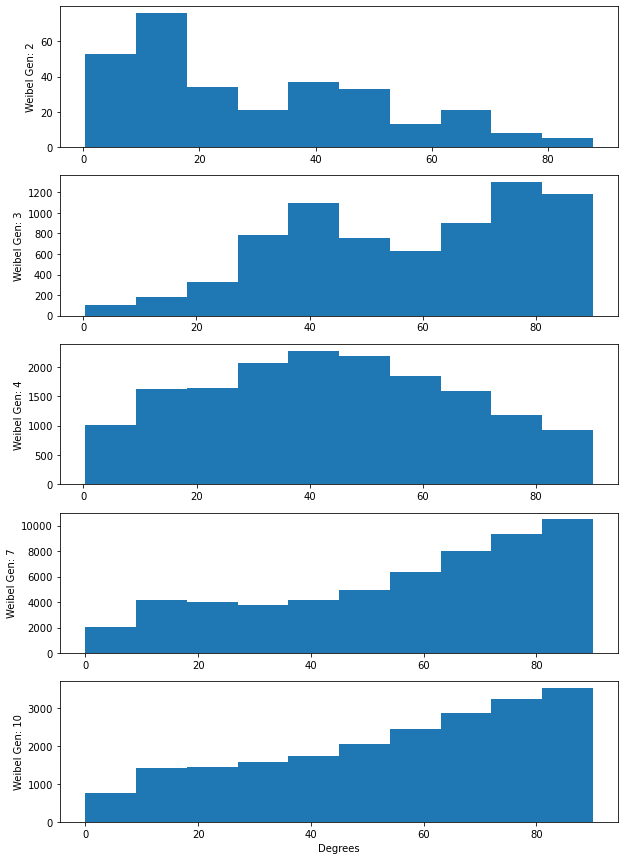

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [19]:
df_rotation = total_df.copy()
p
i=0
gens_to_show = [2,3,4, 7, 10]
f, axes = plt.subplots(len(gens_to_show),1, figsize=(10,15))
for gen in gens_to_show:
    df_rotation.loc[(df_rotation.gen.astype(float)==gen) & (df_rotation['Bifurcation'])]['plane_rotation'].hist(ax=axes[i], grid=False)
    axes[i].set_ylabel(f'Weibel Gen: {gen}')
    
    i+=1
axes[-1].set_xlabel(f'Degrees')  
plt.savefig('plane_rotation_w_subplots.png')
plt.show()

plt.figure()

In [30]:
# QC paths only
qc_df = total_df.copy()
qc_df.loc[qc_df.anatomicalname!= '-']

,idno,startbpid,anatomicalname,centerlinelength,avginnerarea,lobe,sublobe,endbpid,angle,dircosx,...,Bifurcation,Other Branching Mode (Not B/D),Planar Bifurcation (0-30),Orthogonal Bifucation (60-90),Intermediate Bifucation (30 < x <60),gen,angle_ratio,min_angle,max_angle,min_centerline
0,3010007,-1.0,['Trachea'],[104.962],[351.513],[0.0],[0.0],[1.0],[0.0],[-0.0244456],...,False,True,False,False,False,0,NaN,0.0000,0.000,104.96200
1,3010007,1.0,"['LMB', 'RMB']","[51.0142, 25.4442]","[148.681, 215.569]","[0.0, 0.0]","[0.0, 0.0]","[3.0, 2.0]","[140.036, 134.805]","[0.608512, -0.694225]",...,True,False,False,False,True,1,0.962645,134.8050,140.036,25.44420
2,3010007,2.0,"['BronInt', 'RUL']","[29.8319, 16.6494]","[111.983, 75.6966]","[0.0, 3.0]","[0.0, 0.0]","[4.0, 5.0]","[160.312, 98.5825]","[-0.417837, -0.813123]",...,False,False,False,False,False,2,0.614941,98.5825,160.312,16.64940
3,3010007,3.0,"['LLB6', 'LUL']","[15.2959, 16.0841]","[83.2434, 86.8751]","[2.0, 1.0]","[0.0, 0.0]","[6.0, 7.0]","[167.263, 101.925]","[0.737309, 0.773166]",...,False,False,False,False,False,2,0.609370,101.9250,167.263,15.29590
4,3010007,4.0,"['RB4+5', '-']","[22.3249, 8.9018]","[33.2559, 78.3227]","[4.0, 0.0]","[0.0, 0.0]","[9.0, 8.0]","[126.124, 161.984]","[-0.642289, -0.44905]",...,False,False,False,False,False,3,0.778620,126.1240,161.984,8.90180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464864,8024995,308.0,"['-', '-']","[12.3646, 9.16879]","[6.04191, 7.22419]","[2.0, 2.0]","[9.0, 9.0]","[329.0, 330.0]","[153.991, 160.4]","[0.050637, 0.188608]",...,True,False,True,False,False,11,0.960044,153.9910,160.400,9.16879
464865,8024995,311.0,"['-', '-']","[17.5152, 12.4789]","[4.86122, 5.4432]","[2.0, 2.0]","[9.0, 9.0]","[332.0, 331.0]","[104.659, 160.87]","[-0.553372, 0.371391]",...,False,False,False,False,False,11,0.650581,104.6590,160.870,12.47890
464866,8024995,314.0,"['-', '-']","[1.41913, 6.14524]","[-1.0, 6.48287]","[5.0, 5.0]","[16.0, 16.0]","[333.0, 334.0]","[82.0459, 165.132]","[0.894427, 0.164399]",...,False,False,False,False,False,12,0.496850,82.0459,165.132,1.41913
464867,8024995,317.0,"['-', '-']","[15.641, 7.5457]","[6.87548, 6.98296]","[5.0, 5.0]","[19.0, 19.0]","[335.0, 336.0]","[156.669, 161.623]","[0.0741249, 0.205076]",...,True,False,True,False,False,12,0.969348,156.6690,161.623,7.54570


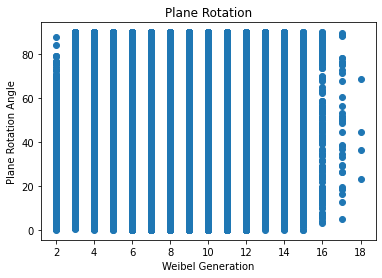

In [77]:
plt.figure()
plot_df = total_df.dropna(subset=['plane_rotation'])
plt.scatter(plot_df.gen, plot_df.plane_rotation)
# plt.colorbar(label="weibel generation", orientation="horizontal")
plt.xlabel("Weibel Generation")
plt.ylabel("Plane Rotation Angle")
plt.title('Plane Rotation')
plt.show()

In [22]:
100*(total_df[['bifurcation?', 'domain?', 'other_mode?', 'planar_bi', 'orthog_bi', 'other_bi']].sum()/len(total_df)).round(2)

KeyError: "None of [Index(['bifurcation?', 'domain?', 'other_mode?', 'planar_bi', 'orthog_bi',\n       'other_bi'],\n      dtype='object')] are in the [columns]"

In [ ]:
colours = {
    'Domain Branching':'#428bca', 
    'Planar Bifurcation (0-20)':'#5cb85c',
    'Orthogonal Bifucation (70-90)':'#d9534f',
    'Other Bifucation (20 < x <70)':'#ffad60',
    'Other Branching Mode (Not B/D)':'#d896ff'
}

,gen,Domain Branching,Bifurcation,Other Branching Mode (Not B/D),Planar Bifurcation (0-30),Orthogonal Bifucation (60-90),Intermediate Bifucation (30 < x <60),endbpid
0,0,0,0,2911,0,0,0,2911
1,1,12,2882,16,0,0,2882,2910
2,2,3315,324,2200,172,38,114,5839
3,3,1579,7296,1818,769,3639,2888,10693
4,4,2405,18546,1877,4873,4321,9352,22828
5,5,6638,35168,2841,6896,16243,12029,44647
6,6,13841,52748,6077,11178,25838,15732,72666
7,7,19402,58578,10537,11390,30112,17076,88517
8,8,19791,48140,11884,9605,23788,14747,79815
9,9,14639,33553,9500,6839,16305,10409,57692


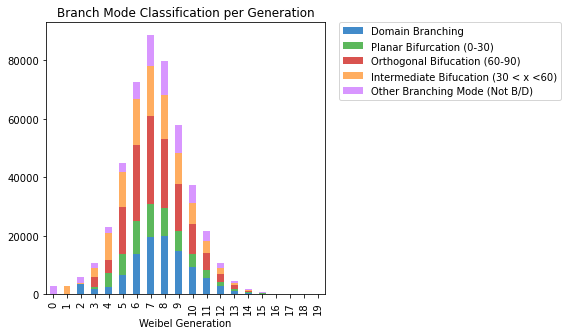

In [25]:


categories = total_df.groupby('gen').agg({
    'Domain Branching': sum,
    'Bifurcation': sum,
    'Other Branching Mode (Not B/D)':sum,
    'Planar Bifurcation (0-30)': sum,
    'Orthogonal Bifucation (60-90)': sum,
    'Intermediate Bifucation (30 < x <60)':sum,
    'endbpid': "count"
}).reset_index()

# renaming = {"domain?":"Domain Branching",
#     "bifurcation?": "Bifurcation",
#         "other_mode?":"Other Branching Mode (Not B/D)",
#             "planar_bi": "Planar Bifurcation (0-20)",
#                 "orthog_bi":"Orthogonal Bifucation (70-90)",
#                     "other_bi": "Other Bifucation (20 < x <70)"}
categories.rename(columns=renaming, inplace=True)

display(categories)
f, ax = plt.subplots()
ax.set_xticks(np.arange(0, 20, 1))
categories.plot.bar(x='gen', y=['Domain Branching', 'Planar Bifurcation (0-30)','Orthogonal Bifucation (60-90)', 'Intermediate Bifucation (30 < x <60)', 'Other Branching Mode (Not B/D)'],color=colours, stacked=True, ax=ax,grid=False, figsize=(5,5))
ax.set_title("Branch Mode Classification per Generation")
ax.set_xlabel("Weibel Generation")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.savefig("branch_modes_per_gen.jpg", bbox_inches="tight")
plt.show()

In [ ]:
# as % of total per generation
f, ax = plt.subplots()
ax.set_xticks(np.arange(0, 7, 1))
as_percent = categories[['Domain Branching', 'Planar Bifurcation (0-20)','Orthogonal Bifucation (70-90)', 'Other Bifucation (20 < x <70)', 'Other Branching Mode (Not B/D)', 'endbpid']].apply(lambda x: x/x.endbpid, axis=1)
as_percent['Weibel Generation'] = categories['gen']
display(as_percent)
as_percent.loc[(as_percent['Weibel Generation'] <= 10)&(as_percent['Weibel Generation'] >= 2)].plot.bar(x='Weibel Generation', y=['Domain Branching', 'Planar Bifurcation (0-20)','Orthogonal Bifucation (70-90)', 'Other Bifucation (20 < x <70)', 'Other Branching Mode (Not B/D)'], stacked=True,color=colours, ax=ax,grid=False, figsize=(5,5))
ax.set_title('Branch modes as % of total segments per generation')
ax.set_xlabel("Weibel Generation")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.savefig("branch_modes_per_gen_percent.jpg", bbox_inches="tight")
plt.show()

In [ ]:
f, ax = plt.subplots()

ax.set_xticks(np.arange(0, 20, 1))

total_df.hist("gen",bins=20,  ax=ax, grid=False, figsize=(5,5))
ax.set_title("Number of branch points per generation")
ax.set_xlabel("Weibel Generation")
ax.set_ylabel('#segments')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.savefig("segments_per_gen.jpg", bbox_inches="tight")
plt.show()

In [ ]:
total_df.columns


KeyError: "None of [Index(['domain?', 'other_mode?', 'planar_bi', 'orthog_bi', 'other_bi'], dtype='object')] are in the [columns]"

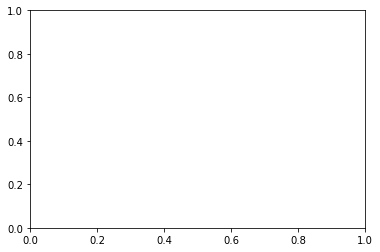

In [20]:

renaming = {"domain?":"Domain Branching",
    "bifurcation?": "Bifurcation",
        "other_mode?":"Other Branching Mode (Not B/D)",
            "planar_bi": "Planar Bifurcation (0-20)",
                "orthog_bi":"Orthogonal Bifucation (70-90)",
                    "other_bi": "Other Bifucation (20 < x <70)"}

renaming_lobes = {0:'C', 1:'LUL', 2:'LLL', 3: 'RUL', 4: 'RML', 5:'RLL'}

f, ax = plt.subplots()
# total_df['lobe'] = total_df.lobe.str.strip("[]").str.split(",")
w_lobes= total_df.explode('lobe')
w_lobes['lobe'] = w_lobes['lobe'].apply(lambda x:float(x)).apply(lambda x:renaming_lobes[x])
grouped = w_lobes.groupby('lobe').agg(sum)[['domain?', 'other_mode?', 'planar_bi', 'orthog_bi', 'other_bi']].reset_index()
grouped.rename(columns=renaming, inplace=True)
grouped.plot.bar(x='lobe', y=['Domain Branching', 'Planar Bifurcation (0-20)','Orthogonal Bifucation (70-90)', 'Other Bifucation (20 < x <70)', 'Other Branching Mode (Not B/D)'],stacked=True, sharey=True,color=colours,  ylabel='#segments', figsize=(5,5), ax=ax)
ax.set_ylabel('#segments')
ax.set_xlabel('Lobes')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.savefig("segments_per_lobe.jpg", bbox_inches="tight")
plt.show()

In [ ]:
# merged = df_clean.copy().merge(w_lobes[['idno', 'startbpid', 'endbpid', 'domain?', 'bifurcation?', 'other_mode?', 'planar_bi', 'orthog_bi', 'other_bi']],on=['idno', 'startbpid', 'endbpid'], how='left')


# # In[ ]:


# # merged[['idno', 'startbpid', 'endbpid', 'domain?', 'bifurcation?', 'other_mode?']].apply(lambda x:['domain?', 'bifurcation?', 'other_mode?'][np.argmax(x[['domain?', 'bifurcation?', 'other_mode?']])],axis=1)
# merged[['domain?', 'bifurcation?', 'other_mode?', 'planar_bi', 'orthog_bi', 'other_bi']].fillna(False, inplace=True)
# # merged[['domain?', 'bifurcation?', 'other_mode?']].dropna().astype(int).idxmax(axis=1)
# merged['category'] = merged[['domain?',  'other_mode?', 'planar_bi', 'orthog_bi', 'other_bi']].astype(int).idxmax(axis=1)
